# Finding the Best Two Markets to Advertise In

## 1. Introduction

This project is aimed at finding the best two markets to advertise in, within the scope of e-learning platforms for programming. Programming is a very broad field, consisting of web development, mobile development, data science, game development and more. Our project assumes that we're mainly interested in web and mobile development, as it matches our product; a monthly subscription-based e-learning platform. Therefore, our target audience consists of new learners within the field of programming, or coding. The purpose of our research is to find out which countries offer the most potential to advertise our product in, both in number of learners and spenditure on learning.

## 2. The data

The data that will be used in this project is the data from __[freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969)__. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), making it an ideal source of data for the purpose of our analysis. 

The survey data is publicly available and can be downloaded from __[this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)__.

Below, we import and explore the survey data.

In [146]:
# importing pandas
import pandas as pd

# read in the file
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', engine='python')

print(fcc_survey.head())
print(fcc_survey.info())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0 27.00              0.00             nan                nan          NaN   
1 34.00              0.00             nan                nan          NaN   
2 21.00              0.00             nan                nan          NaN   
3 26.00              0.00             nan                nan          NaN   
4 20.00              0.00             nan                nan          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                nan             nan            more than 1 million   
1                nan             nan              less than 100,000   
2                nan             nan            more than 1 million   
3                nan             nan  between 100,000 and 1 million   
4                nan             nan  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   nan                 

## 3. Sample Representativity

We observe that the data set contains 18,175 rows and a very high number of columns, 136 to be precise. Each row corresponds with one survey respondent, so that we have over 18,000 respondents in our data set. The goal of this project is to establish which markets to advertise in, as an e-learning platform dedicated to programming. Before we can do so, we have to determine whether the sample we are working with is representative of the total population of new coders. We do not have access to any data about the total population, so our best estimate would be to check whether the respondents in our sample are indeed interested in job roles related to our main fields of interest; web and mobile development.

In [147]:
# generating and displaying a frequency distribution table
fcc_survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                   11.77
  Front-End Web Developer                                                                                                                                                                                                                                                   6.44
  Data Scientist                                                                                                                                                                                                                                                            2.17
Back-End Web Developer                                                                                                                                                               

In [148]:
# selecting only single job role responses
single = fcc_survey[~fcc_survey['JobRoleInterest'].str.contains(',', na=False)].copy()
single = single[single['JobRoleInterest'].notna()]

In [149]:
# generating a frequency distribution table for the new dataframe
freq_table = single['JobRoleInterest'].value_counts(normalize = True) * 100

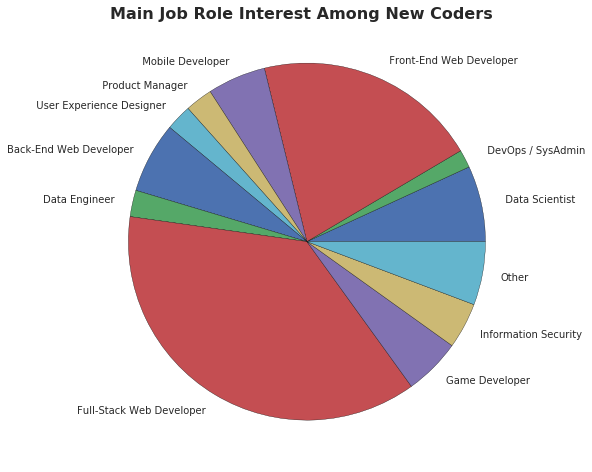

In [150]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# visualizing the distribution of job role interests in a pie chart
fig, ax1 = plt.subplots(figsize=(8,8))
# classifying minor job role interests as 'Other'
ax1 = freq_table.groupby(np.where(freq_table>=1,freq_table.index,'Other')).sum().plot.pie()
ax1.set_ylabel('')
ax1.text(-1.1, 1.25, 'Main Job Role Interest Among New Coders', size = 16, weight = 'bold')
plt.show()

In [151]:
print('Frequency distribution of job role interests', '\n')
print(round(freq_table.head(10), 2))
print('\n', 'Total percentage of interest in web and mobile development categories:','\n',round(sum(freq_table.iloc[[0,1,3,4]]), 2))

Frequency distribution of job role interests 

Full-Stack Web Developer     37.19
  Front-End Web Developer    20.33
  Data Scientist              6.87
Back-End Web Developer        6.42
  Mobile Developer            5.29
Game Developer                5.15
Information Security          4.16
  Product Manager             2.49
Data Engineer                 2.39
  User Experience Designer    2.35
Name: JobRoleInterest, dtype: float64

 Total percentage of interest in web and mobile development categories: 
 69.23


#### Analysis
The first frequency distribution table shows a large number of different responses, which makes it difficult to gain insights from the data. Presumably, respondents were able to select multiple answers, as well as providing additional answers themselves. To give us a clear picture of the main job role interests of new coders, we first filtered out all the respondents that answered with a combination of roles. We then grouped the minor job roles (less than one percent) into the 'Other' category and generated a pie chart to visualize the distribution of job interests. As the pie chart and the second frequency distribution table display, about 70 percent of our sample is interested in web and mobile development. This could even be more, but also lower, given the fact that we have filtered out combinations of interests. Nevertheless, it seems plausible that we have a representative sample to work with.

## 4. Locations and Densities of New Coders

The following step is to examine where new coders are located. This would help an e-learning company help to make decisions about which locations to focus their marketing budget on. Because the data set provides information at a country level, our goal is to find the two best countries to advertise in. Before we take this step, some additional data cleaning will be done. From this part of the analysis on, we will only retain respondents who have answered what role they are interested in.  Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [152]:
fcc_clean = fcc_survey[fcc_survey['JobRoleInterest'].notna()].copy()

In [153]:
print('New Coders per Country','\n')
print(fcc_clean['CountryLive'].value_counts().head(10),'\n')
print('New Coders per Country, %', '\n')
freq_pct = round(fcc_clean['CountryLive'].value_counts(normalize = True) * 100, 2)
print(freq_pct.head(10))

New Coders per Country 

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64 

New Coders per Country, % 

United States of America   45.70
India                       7.72
United Kingdom              4.61
Canada                      3.80
Poland                      1.92
Brazil                      1.89
Germany                     1.83
Australia                   1.64
Russia                      1.49
Ukraine                     1.30
Name: CountryLive, dtype: float64


#### Analysis
The frequency tables indicate that the **United States** should most likely be our top priority for advertising. Almost half of the respondents are based in the United States, with no other country being anywhere close. In other words, the United States is by far the largest market for our e-learning platform. The second largest market would be **India**, based on the number of new coders. However, as the **United Kingdom** and **Canada** are not too far behind, it might be worth taking these countries into consideration as well.

## 5. Spending Money for Learning Per Country

In this section we will take a look at the spending patterns in each of the four mentioned countries. The data set contains informationa about the amount of money that students have spent on learning how to code. It also contains information about how long they have been studying, expressed in a number of months. In the code below, we use these two columns to find out how much money students spend per month on e-learning. The product of our company is subscription-based and is priced at $59 per month. This will be the guideline for our further analysis.

In [154]:
# replacing the zeroes with ones in the MonthsProgramming column
fcc_clean['MonthsProgramming'] = fcc_clean['MonthsProgramming'].replace(0,1)

# creating a column for the average amount of money spent per month learning
fcc_clean['MoneyPerMonth'] = fcc_clean['MoneyForLearning'] / fcc_clean['MonthsProgramming']

# exploring monthly money spending
fcc_clean['MoneyPerMonth'].value_counts().head(10)

0.00      3092
50.00      128
25.00      120
16.67      118
100.00     118
33.33      109
8.33       105
20.00       88
10.00       83
83.33       80
Name: MoneyPerMonth, dtype: int64

In [155]:
# retaining only the rows that don't have a null value for monthly spending
fcc_clean = fcc_clean[fcc_clean['MoneyPerMonth'] > 0]

# retaining only the rows that don't have a null value in the CountryLive column
fcc_clean = fcc_clean[fcc_clean['CountryLive'].notnull()]

In [156]:
groupby = fcc_clean.groupby('CountryLive')['MoneyPerMonth'].mean()
print(groupby.loc[['United States of America', 'India', 'United Kingdom', 'Canada']])

CountryLive
United States of America   413.04
India                      311.20
United Kingdom              92.73
Canada                     238.97
Name: MoneyPerMonth, dtype: float64


#### Analysis
Having computed the mean monthly spending on e-learning for the four countries with the most students, it seems that the United States is still the market with the highest potential, followed by India. The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics, like GDP per capita, we'd intuitively expect people in the United Kingdom and Canada to spend more on learning than people in India. This prompts the question whether we have enough representative data for these countries, or that we have some extreme outliers pulling the mean either up or down. This will be the point of focus for the next section.

## 6. Dealing with Extreme Outliers



In [157]:
# isolating respondents from the four remaining countries of interest 
four_countries = fcc_clean[fcc_clean['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])].copy()

In [158]:
import seaborn as sns

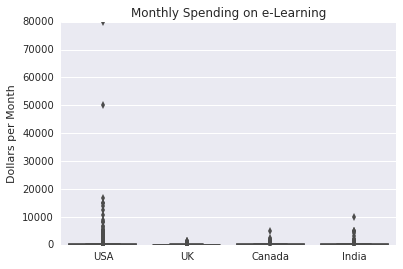

In [223]:
fig, ax2 = plt.subplots()
sns.boxplot(x = 'CountryLive',
            y = 'MoneyPerMonth',
            data = four_countries,
            ax = ax2
           )
ax2.set(xlabel = '', ylabel = 'Dollars per Month',
        xticklabels = ['USA', 'UK', 'Canada', 'India']
       )
plt.title('Monthly Spending on e-Learning')

#### Analysis
The box plot above suggests that our previously calculated mean monthly spending figures were highly distorted by outliers. The boxes of the plot are not even visible because of the values of the extreme outliers. It is not realistic to spend thousands of dollars per month on learning how to code. We assume that these inputs have either been mistakes by respondents, or result from high, one-time expenses of students participating in expensive bootcamps. 
Since the product we are going to advertise is priced at \$59 per month, we can drastically decrease the upper limit of monthly spending in our data set. We have briefly studied monthly pricing rates of a few e-learning platforms that focus on web and mobile development. Taking __[Udacity](https://www.udacity.com)__ as an example of a somewhat expensive platform, it seems plausible that students are willing to pay a few hundred dollars per month for a single. As such, we will set an upper limit of $2,000 per month. This is still somewhat cautious and leaves room for the possibility of students, for example, being subscriped to multiple e-learning platforms, or otherwise spending high sums of money per month.

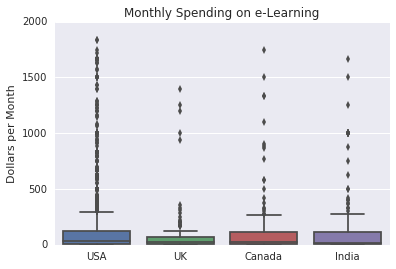

In [224]:
fc = four_countries[four_countries['MoneyPerMonth'] < 2000]

fig, ax3 = plt.subplots()
sns.boxplot(x = 'CountryLive',
            y = 'MoneyPerMonth',
            data = fc,
            ax = ax3
           )
ax3.set(xlabel = '', ylabel = 'Dollars per Month',
        xticklabels = ['USA', 'UK', 'Canada', 'India']
       )
plt.title('Monthly Spending on e-Learning')

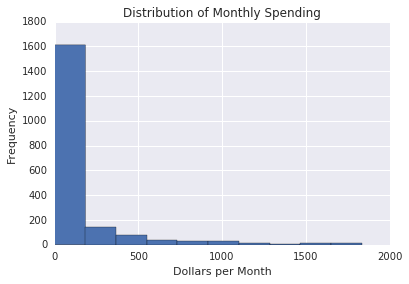

In [173]:
fc['MoneyPerMonth'].hist()
plt.xlabel('Dollars per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Spending')

#### Analysis
The second box plot does a better job than the first one, but is still distorted by the outliers. Our upper limit of \$2000 per month seems to have been too conservative. Fortunately, time we are able to actually see the upper whiskers of each country. These are located well under \$500, indicating that the vast majority of learners are spending less than \$500 per month. The histogram confirms this: it shows that the distribution of monthly spenditure on e-learning is strongly skewed to the right. Only a fraction of the respondents are spending more than \$500 per month, so our next step is to lower the limit to 500 dollars per month, and re-evaluate the results.

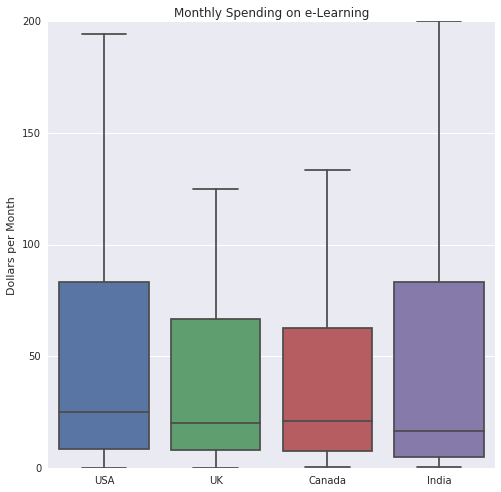

In [240]:
fc_u500 = fc[fc['MoneyPerMonth'] <= 500].copy()

fig, ax4 = plt.subplots(figsize=(8,8))
sns.boxplot(x = 'CountryLive',
            y = 'MoneyPerMonth',
            data = fc_u500,
            ax = ax4,
            showfliers = False
           )
ax4.set(xlabel = '', ylabel = 'Dollars per Month',
        xticklabels = ['USA', 'UK', 'Canada', 'India']
       )
plt.title('Monthly Spending on e-Learning')

In [221]:
# calculating the new mean monthly spenditure
mean_country = fc_u500.groupby('CountryLive')['MoneyPerMonth'].mean()
median_country = fc_u500.groupby('CountryLive')['MoneyPerMonth'].median()

print(mean_country) 
print()
print(median_country)

CountryLive
Canada                     62.94
India                      63.60
United Kingdom             52.40
United States of America   74.71
Name: MoneyPerMonth, dtype: float64

CountryLive
Canada                     21.13
India                      16.67
United Kingdom             20.00
United States of America   25.00
Name: MoneyPerMonth, dtype: float64


#### Analysis
Our final box plot figure gives a more clear picture. The United States remains the most interesting market to advertise for our e-learning platform. Its median value is visibly higher than in other countries, and its upper quartile is on par with India. For a more clear visualization, outliers were removed from the final box plot, but in the initial figure the United States also had quite some outliers as well, suggesting that there's additional potential within the still reasonable \$200-\$500 range. This is also shown by the mean values, where the United States (at \$74 per month) clearly ranks higher than the other countries.

As for the second country to focus our advertising efforts on, based on money spent on learning, that is where it gets more complicated. Looking at the mean monthly spenditure, both Canada and India look interesting. An argument in favor of India is that its upper quantile is clearly higher than Canada's, indicating that a greater proportion of learners in India are willing to spend higher amounts of money. An argument in favor in Canada however, is that its median is vastly higher than India's. In other words, the median monthly spenditure in Canada is closer to our product's monthly price of \$59. The mean monthly spenditure in both countries is virtually the same. Other factors may be decisive in determining which country to pick as our second point of focus. This will be discussed below.

## 7. Conclusion

In this project we have aimed to find an answer to the question: which two countries are the best markets to advertise our subscription-based e-learning platform in? We specifically targeted learners who are interested in programming, and worked with a data set in which roughly seventy percent of  respondents stated that they have an interest in web and mobile development. Our product is a subscription-based e-learning platform focused on web and mobile development, priced at \$59 per month.

We found that most of the learners are located in the United States, India, the United Kingdom and Canada. Of these four countries, still a vast majority of learners are Americans, and monthly spenditure on learning is higher in the US than in the other three countries. For this reason, the **United States** should be the top priority for our advertising campaign.

The second country is a more complicated question. Based on our research, the second chocice should either be **India** or **Canada**. The number of Indian respondents in our data set is much higher than the number of Canadians, and also in relative terms, the proportion of learners that are willing to spend . On the other side, the median spenditure is vastly higher in Canada, indicating that the amount of money most Canadians are willing to spend is closer to our product's price. This could mean that there are more opportunities in Canada when applying discounts and cheaper products (e.g. subscription packages that offer less access or material than the premium package priced at \$59 per month). 

Altogether, India seems to have a slight benefit over Canada, but it depends on our exact strategy. Other factors may have to be taken into consideration as well, in order to make an informed decision. In terms of logistics, would it be more cost efficient to combine our focus on the United States with Canada, rather than India? To which extent is our product scalable, and does this bring benefits when focusing on India's massive population size? 
The case could also be made that the United States offers so much more potential than the other three countries examined in this project, that it makes sense to advertise only in the US. Our results suggest that there are many more learners in the United States and they are evidently spending more money on learning.